# All at odds - Part 2 

In the last post, we analysed the starting odds for games that ended as Home wins, Away wins, and Draws. We noticed something in the charts that required further investigation. When we looked at the starting odds for games that ended as a Home win the starting odds for the game, in the vast majority of cases, had the Home win odds shorter (lower) than Away win and Draw odds. In other words, it looked as if the market was very good at predicting Home wins. Similar analysis of Away wins and Draws did not yield matching results. Now, we need to investigate that finding further.

Let's have a quick recap of the findings from the last time, so we can reference it here. Without explaining in detail, here is the code we used to produce the Boxplot for Home wins. For a detailed explanation then you can reference Part 1 of this series.

<AxesSubplot:title={'center':'Starting odds for home wins'}>

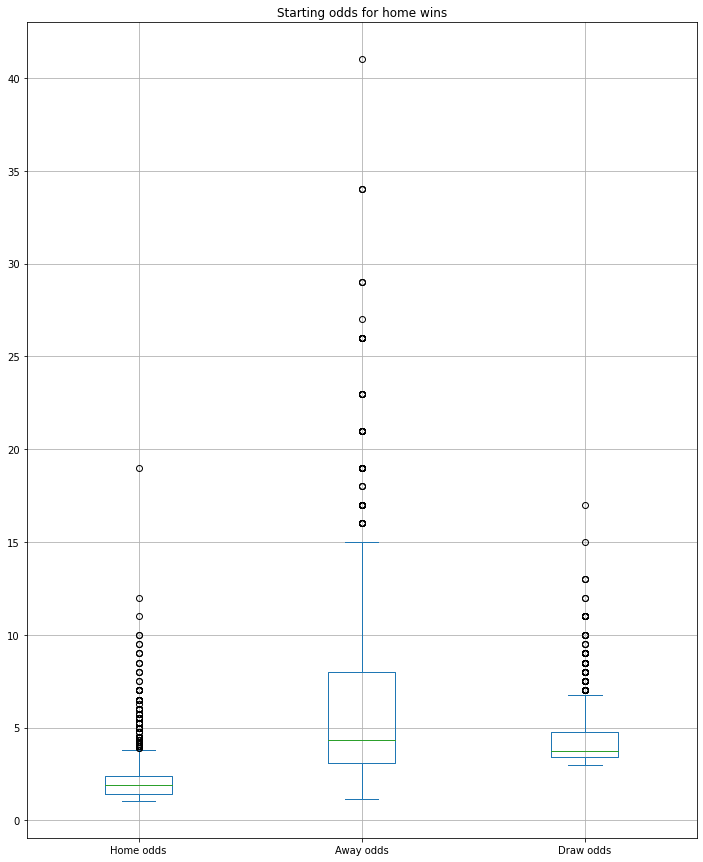

In [88]:

# from Part 1 of this series
# load dependencies and data
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#load all csv files and append to a single dataframe
path = '../../../GitHub/England-EPL' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

footdata = pd.concat(li, axis=0, ignore_index=True)

footdata.rename(columns={'B365H': 'Home odds',
                            'B365A': 'Away odds',
                              'B365D': 'Draw odds'},
                     inplace=True, errors='raise')

# to make the dataframe more manageable and readable let's select only the columns we want to analyse

footdata_odds = footdata[['FTR','Home odds','Away odds','Draw odds']]

#create a table with a subset of the data for Home win, Away win and Draw
footdata_odds_h = footdata_odds.loc[footdata_odds['FTR'] == "H"]
footdata_odds_a = footdata_odds.loc[footdata_odds['FTR'] == "A"]
footdata_odds_d = footdata_odds.loc[footdata_odds['FTR'] == "D"]
#plot the boxplot for games that ended a home win. Nice and big, so we can get a good look at the data.
footdata_odds_h.plot(kind='box', figsize=(12,15),title=('Starting odds for home wins'),grid='TRUE')


The vast majority of games show that the starting odds of the Home win are less than the starting odds for Away win and Draw. As a general rule, the odds for the Draw tend to be higher than at least one, if not both of the other odds. More about this later.

We need to add a word of caution at this point. What we are seeing is the starting odds for matches that ended as a Home win. Of course, at the start of the game, we don't know the outcome. So the question that we need to answer is "what is the probability of a Home win when the Home win odds are less than Away odds or Draw odds"

The ideal tool for answering the question "What is the probability of X given Y" is Bayes Theorem. That is exactly what Bayes does and it will help us here to very easily decide if there is a direct link between the outcome given the odds at the start. I also have to acknowledge the wonderful work of reference Think Bayes by Allen B. Downey was in helping me to understand the concept and answer this question. Anyone who has read the book may see some familiar code used here. 

We have already loaded the data we are to use, let's have a quick look at the main table. Then we will drop data columns with the exception of the result and starting odds columns.

In [89]:
footdata

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
4419,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
4420,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
4421,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


In [95]:


# to make the dataframe more manageable and readable let's select only the columns we want to analyse

footdata_odds = footdata[['FTR','Home odds','Away odds','Draw odds']]

footdata_odds

,FTR,Home odds,Away odds,Draw odds
0,H,2.00,4.0,3.30
1,H,2.88,2.5,3.25
2,D,2.20,3.4,3.30
3,H,1.17,17.0,7.00
4,D,2.10,3.6,3.30
...,...,...,...,...
4418,H,1.14,15.0,8.50
4419,H,1.44,6.5,5.00
4420,H,2.80,2.4,3.60
4421,H,1.65,5.0,4.00


The following code creates 2 functions to call as we prepare to analyse the probabilities. The first allows us to calculate the probability of a particular outcome occurring while the second gives us a conditional probability. It is the latter we wish to know but to get there we need to extract the right data.

In [74]:


def prob(A):
    """Computes the probability of a proposition, A."""    
    return A.mean()

In [75]:


def conditional(proposition, given):
    """Probability of A conditioned on given."""
    return prob(proposition[given])

Next, we prepare to make our comparisons. We will create three tables 'home', 'away', and 'draw'. Each of these will contain 4422 rows and a Boolean representing Home wins, Away wins, and Draws. Using Pandas to create these tables, each stores the Boolean as 0 for FALSE and 1 for TRUE. This then enables us to 'sum' the total True values in each. We can also use the 'mean' function to calculate the number of TRUE entries as a proportion of the total i.e. the probability of a particular outcome is the series.

In [76]:

home = (footdata['FTR'] == 'H')
home.head()

0     True
1     True
2    False
3     True
4    False
Name: FTR, dtype: bool

In [77]:

away = (footdata['FTR'] == 'A')
away.head()

0    False
1    False
2    False
3    False
4    False
Name: FTR, dtype: bool

In [78]:

draw = (footdata['FTR'] == 'D')
draw.head()

0    False
1    False
2     True
3    False
4     True
Name: FTR, dtype: bool

In [79]:

home.sum(), away.sum() ,draw.sum()

(1967, 1359, 1096)

In [80]:

home.mean(), away.mean() , draw.mean()

(0.44472077775265656, 0.3072575175220439, 0.24779561383676238)

Now if we run these tables through our function 'prob' created earlier, then we can see the probability of the outcome. These are probabilities, i.e. between 0 and 1. So for Home wins 0.44472077775265656 equates to approx 44.5% of all matches ending as a Home win. Similarly, 30.7% Away wins and 24.8% draws. We know from these figures compared to the 'sum' and 'mean' functions above that the 'prob' function works.

In [81]:

prob(home), prob(away), prob(draw)

(0.44472077775265656, 0.3072575175220439, 0.24779561383676238)

Similarly, we now create tables for odds where Home odds are lower than Away odds or vice versa. Here, we are ignoring the odds for the Draw. Simply put the odds for the Draw are never lower than those for a result either at home or away. Creating a table for situations where Draw odds were lower would only result in an empty table. This reflects the difficulty in predicting draws in football.

In [63]:

lower_odds = (footdata['Home odds'] < (footdata['Away odds'])) & (footdata['Home odds'] < (footdata['Draw odds']))
lower_odds.sum()

3049

In [91]:

higher_odds = (footdata['Away odds'] < (footdata['Home odds'])) & (footdata['Away odds'] < (footdata['Draw odds']))
higher_odds.sum()

1347

In [83]:

prob(lower_odds), prob(higher_odds)

(0.6893511191498982, 0.30454442685959754)

At last, we are all ready to go. We see from the above that around 70% of the time Home win odds are lower than away win odds, which you would expect to be the case. Exciting, at last, we can find the answer to our question "what is the probability of a Home win when the Home win odds are less than Away odds or Draw odds"

In [99]:

conditional(home, given=lower_odds) 

0.5388652017054772

I have to be honest and say that was rather an anticlimax. Where the Home win odds are below the odds for an Away win, the outcome is a home win only 53.8% of the time. This seems really low given the chart we saw at the start. It looked like odds for Home wins were always below the others, so what happened?

The outcome can be explained with the following two main reasons.

1. The impact of the Draw. We know that 24.7% of games end as a draw, but that the odds of a Draw are always above those of Home and Away wins. Therefore, the best outcome for Home wins where Home win odds are lower is around 75% of games as around 25% will end up as Draws.

2. The other 21% of games? Well, that's just the nature of football. Players, teams, referees have an off day. Balls hitting the woodwork and not going into the goal, deflections of shots past a goalkeeper, etc etc etc. That's the randomness of football.

If we were to disregard the draw, then we would be 78% accurate, but the draw is part of the game.

Let's just check the figures for matches where the outcome is a Draw and see how that compares to the starting odds.

In [100]:

conditional(draw, higher_odds), conditional(draw, lower_odds)

(0.2457312546399406, 0.24762217120367333)

That's why football is such an exciting game. Whether odds for a Home win or an Away win are higher, the draw ratio is always around 24.6/24.7% almost the same. These figures are based on a sample size of 4423 games. As that number increases the figures would tend to merge.

Of course in our analysis, we have treated every team the same. We have not looked at strong teams against weak teams. We wanted to see the outcomes based purely on the starting odds. Nor have we considered the relative strength of the odds. That's for the future when we consider more than one variable at a time.

For the sake of completeness let's check the various outcomes where the Home odds were lower than the away odds.

In [101]:

conditional(home, given=lower_odds) , conditional(away, given=lower_odds) , conditional(draw, given=lower_odds) 

(0.5388652017054772, 0.21351262709084945, 0.24762217120367333)

There we can see it. The 21.3% of games end as Away wins where Home odds were lower while 24.7% end as draws. What about the situation where the Away odds are higher, i.e. the market expects an Away win.

Similarly, when Away odds are higher.

In [102]:

conditional(home, given=higher_odds) , conditional(away, given=higher_odds), conditional(draw, given=higher_odds)

(0.23088344469190794, 0.5233853006681515, 0.2457312546399406)

Amazing, almost identical figures. 52.3% accurate with 24.6% draws. That leaves 23% as the random element, being  very close to the figures we found in the case of Home win odds being lower. Again, as the sample size increases towards infinity, these two figures will tend to merge.

Out of curiosity what happens if we turn the probability prediction on its head. Given a Home win, what is the probability of getting Home odds lower?

In [86]:

conditional(lower_odds, given=home), conditional(lower_odds, given=away), conditional(lower_odds, given=draw)

(0.835282155566853, 0.47902869757174393, 0.6888686131386861)

That would have been ideal. Where we have a home win nearly 84% of games have lower starting odds for the Home win. Regrettably, we don't know the outcome before the game starts. Shame. This reflects the outcome that we saw in the Boxplot in the introduction above. It looked useful but has proven not to be so. Finally, for the sake of being complete let's compare the lower Away odds for various outcomes.

In [87]:

conditional(higher_odds, given=home), conditional(higher_odds, given=away), conditional(higher_odds, given=draw)

(0.15810879511947126, 0.5187637969094923, 0.30200729927007297)

## Conclusion

We asked the question "what is the probability of a Home win when the Home win odds are less than Away odds or Draw odds". We were able to calculate the answer, though it did not help us much. The 53% probability of a Home win when Home win odds are the lowest is not enough to be the foundation for a winning strategy on its own. We would need further variables to improve the accuracy. Still, remember that figure as it may prove useful in the future.

Home wins have starting Home odds lower than Away odds 83% of the time. This is really useful information. However, as we don't know the outcome at the start, it does not help us at all. 

In a way, this is a cautionary tale in the world of Data Science. There are often different ways to look at things. We need to check, double-check, and sanity check to prevent ourselves from coming to false or unhelpful conclusions. If you want to learn more about Bayes, then I suggest having a look at Allen Downeys book Think Bayes, which is available on Github. There are a few interesting exercises there to help give a different perspective and show how easy it is to make assumptions and/or come to the wrong conclusion.

Still, I have enjoyed playing with Bayes. So I think, that for Part 3 of this series we will have another Bayes study, this time on a different area.